In [1]:
# linear algebra
import numpy as np 
import statsmodels.api as sm

# data processing
import pandas as pd 
import ydata_profiling as ydp

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# libraries
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# First Glance

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Clean datasets

In both the train_df and test_df, the Age column had significant Null values. Since I believe this is an important piece of information, I choose to use the mean of all ages instead of using 0.

In [7]:
# Calculate the mean of the column
mean_train = train_df['Age'].mean()
mean_train = int(mean_train)
mean_train

29

In [8]:
# Calculate the mean of the column
mean_test = test_df['Age'].mean()
mean_test = int(mean_test)
mean_test

30

In [9]:
train_df['Age'] = train_df['Age'].fillna(29)
test_df['Age'] = test_df['Age'].fillna(30)

In both the train_df and test_df, the Embarked column had some Null values. Since I believe this is an important piece of information, I choose to use the most common value.

In [10]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
test_df['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [12]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

Dropped insignificant columns

In [13]:
# train_df
train_df = train_df.drop(['Ticket'], axis=1)
train_df = train_df.drop(['Name'], axis=1)
train_df = train_df.drop(['Cabin'], axis=1)

#test_df
test_df = test_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

# Explore Data

In [14]:
# Data exploration - train
report = ydp.ProfileReport(train_df, title='YData Profiling report of "Train" set', explorative=True)
# Display the report
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Data exploration - train
report = ydp.ProfileReport(train_df, title='YData Profiling report of "Train" set', explorative=True)
# Display the report
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# rename columns
train_df = train_df.rename(columns={'Pclass': 'Ticket_class', 'SibSp': 'Sib_spouse', 'Parch': 'Parent_child'})
test_df = test_df.rename(columns={'Pclass': 'Ticket_class', 'SibSp': 'Sib_spouse', 'Parch': 'Parent_child'})

# Create EDAs and Models

Heat Map for Correlations

In [17]:
def convert_embarked(data):
    """
    Convert the 'Embarked' column to numeric values.
    """
    ports = {"S": 0, "C": 1, "Q": 2}
    for dataset in data:
        dataset['Embarked'] = dataset['Embarked'].map(ports)


def convert_sex(data):
    """
    Convert the 'Sex' column to numeric values.
    """
    genders = {"male": 0, "female": 1}
    for dataset in data:
        dataset['Sex'] = dataset['Sex'].map(genders)


# Convert 'Embarked' and 'Sex' columns to numeric values
data = [train_df, test_df]
convert_embarked(data)
convert_sex(data)

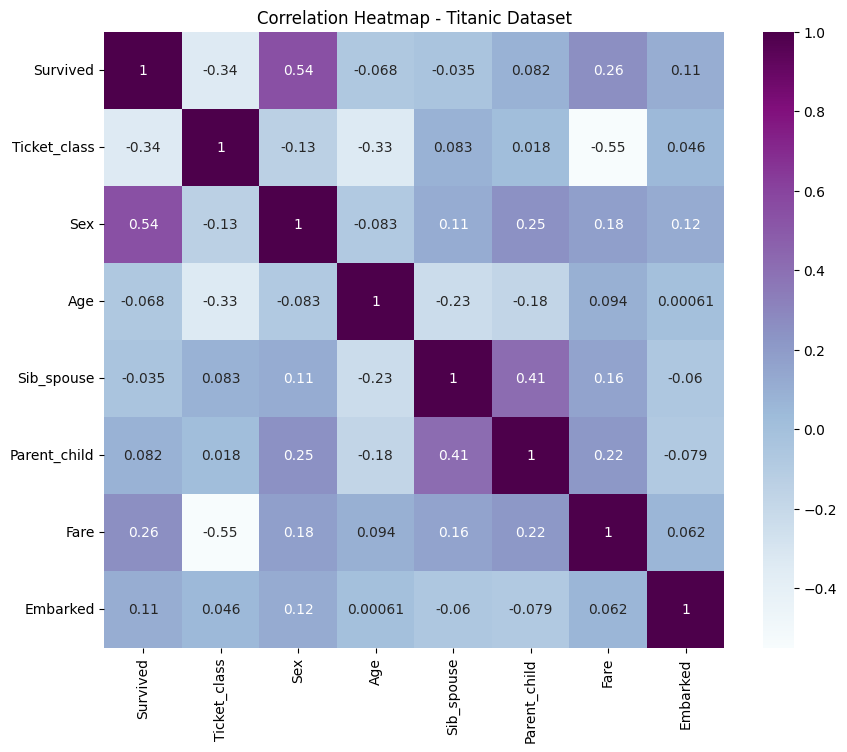

In [18]:
# Select the variables to include in the heatmap
variables = ['Survived', 'Ticket_class', 'Sex', 'Age', 'Sib_spouse', 'Parent_child', 'Fare', 'Embarked']

# Create a correlation matrix
corr_matrix = train_df[variables].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Heatmap - Titanic Dataset')

# Show the plot
plt.show()

Analyzing Correlations from Heat Map

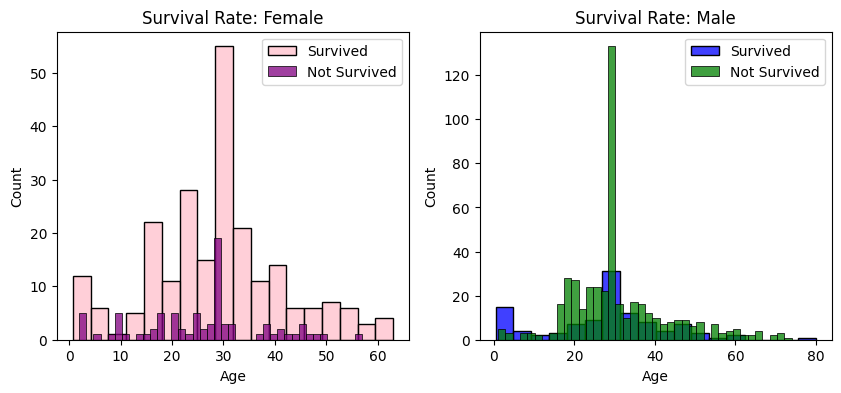

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sns.histplot(train_df[(train_df['Sex']== 1) & (train_df['Survived']==1)]['Age'].dropna(),
                  bins=18, label='Survived', ax=axes[0], kde=False, color='pink')
ax = sns.histplot(train_df[(train_df['Sex']== 1) & (train_df['Survived']==0)]['Age'].dropna(),
                  bins=40, label='Not Survived', ax=axes[0], kde=False, color='purple')
ax.legend()
ax.set_title('Survival Rate: Female')

ax = sns.histplot(train_df[(train_df['Sex']== 0) & (train_df['Survived']==1)]['Age'].dropna(),
                  bins=18, label='Survived', ax=axes[1], kde=False, color='blue')
ax = sns.histplot(train_df[(train_df['Sex']== 0) & (train_df['Survived']==0)]['Age'].dropna(),
                  bins=40, label='Not Survived', ax=axes[1], kde=False, color='green')
ax.legend()
_ = ax.set_title('Survival Rate: Male')

plt.show()

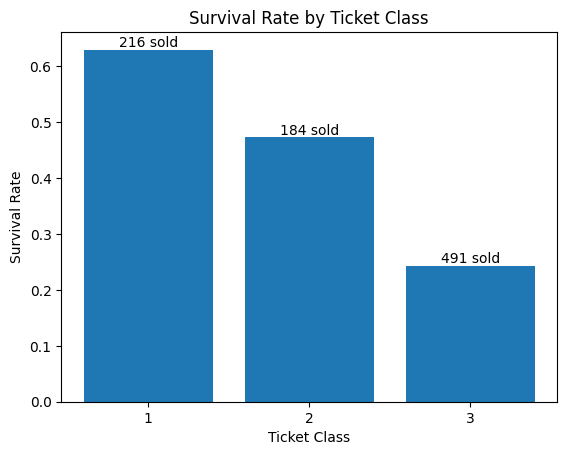

In [20]:
# Group the data by Ticket_class and calculate the survival rate and count of tickets sold
ticket_class_data = train_df.groupby('Ticket_class').agg({'Survived': 'mean', 'Ticket_class': 'count'})
ticket_class_data.columns = ['Survival Rate', 'Tickets Sold']
ticket_class_data.reset_index(inplace=True)  # Reset the index

# create bar chart
plt.bar(ticket_class_data['Ticket_class'], ticket_class_data['Survival Rate'])
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')

# Add labels for the number of tickets sold on top of each bar
for i, count in enumerate(ticket_class_data['Tickets Sold']):
    plt.text(ticket_class_data['Ticket_class'][i], ticket_class_data['Survival Rate'][i], f"{count} sold",
             ha='center', va='bottom')


plt.xticks([1, 2, 3])
plt.show()

In [21]:
# number of relatives
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['Sib_spouse'] + dataset['Parent_child']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

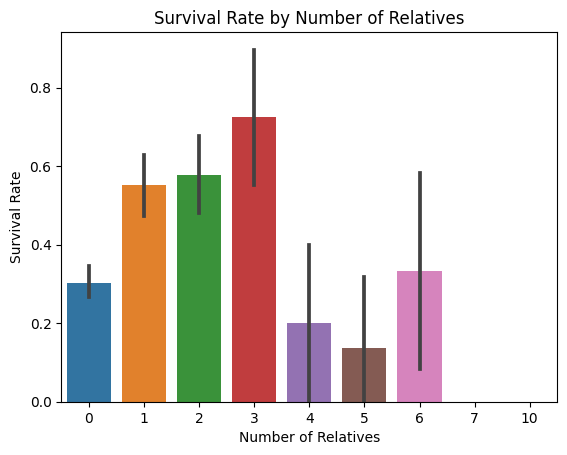

In [22]:
sns.barplot(x="relatives", y="Survived", data=train_df)

# Set the title and axis labels
plt.title("Survival Rate by Number of Relatives")
plt.xlabel("Number of Relatives")
plt.ylabel("Survival Rate")

# Show the plot
plt.show()

Updated Heat Map with Relatives

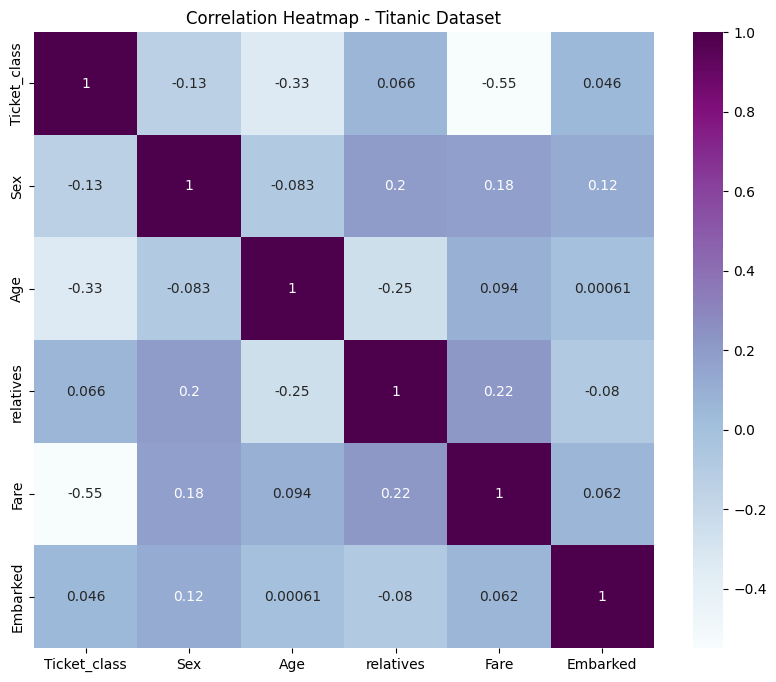

In [23]:
# update heat map with relatives 
variables = ['Ticket_class', 'Sex', 'Age', 'relatives', 'Fare', 'Embarked']

# Create a correlation matrix
corr_matrix = train_df[variables].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Heatmap - Titanic Dataset')

# Show the plot
plt.show()

Logistic Regression Model

In [24]:
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def predict_logistic_regression(model, X_test):
    predictions = model.predict(X_test)
    return predictions

def calculate_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_percentage = round(accuracy * 100, 2)
    return accuracy_percentage

def fit_logit_model(X, y):
    X = sm.add_constant(X)
    logit_model = sm.Logit(y, X)
    results_logit = logit_model.fit()
    return results_logit

# Define the independent variables (X) and the dependent variable (y)
X = train_df[['Ticket_class', 'Sex', 'Age', 'relatives', 'Embarked']]
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the logistic regression model
model = train_logistic_regression(X_train, y_train)

# Make predictions on the test set
predictions = predict_logistic_regression(model, X_test)

# Calculate the accuracy of the model
accuracy = calculate_accuracy(y_test, predictions)
print("Accuracy:", f"{accuracy}%")

# Fit the logistic regression model using statsmodels
results_logit = fit_logit_model(X, y)


Accuracy: 79.33%
Optimization terminated successfully.
         Current function value: 0.442606
         Iterations 6


In [25]:
print(results_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                  0.3353
Time:                        20:06:20   Log-Likelihood:                -394.36
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.283e-84
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3918      0.425      5.622      0.000       1.558       3.226
Ticket_class    -1.1938      0.121     -9.886      0.000      -1.431      -0.957
Sex              2.7370      0.198     13.80

The significance of the logistic regression model can be determined by looking at the p-values associated with the coefficients. In the given results, the p-values for the coefficients of 'const', 'Ticket_class', 'Sex', 'Age', and 'relatives' are all less than 0.05, indicating that these variables are statistically significant in predicting the likelihood of survival. The coefficient for 'Embarked' has a p-value of 0.051, which is slightly above the conventional significance level of 0.05. While it is not statistically significant at the conventional level, it may still have some predictive power. Overall, the model as a whole appears to be significant. 

Random Forest Model - Classification

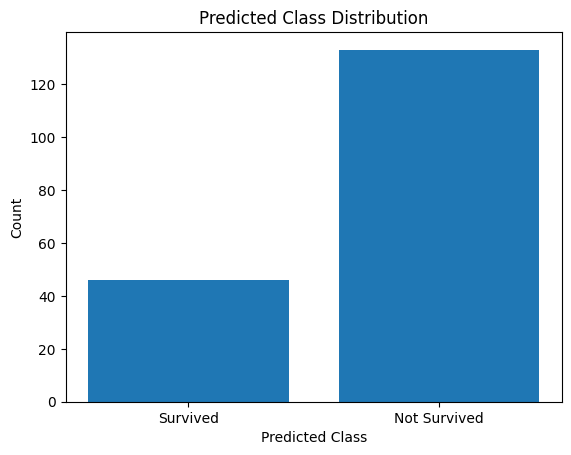

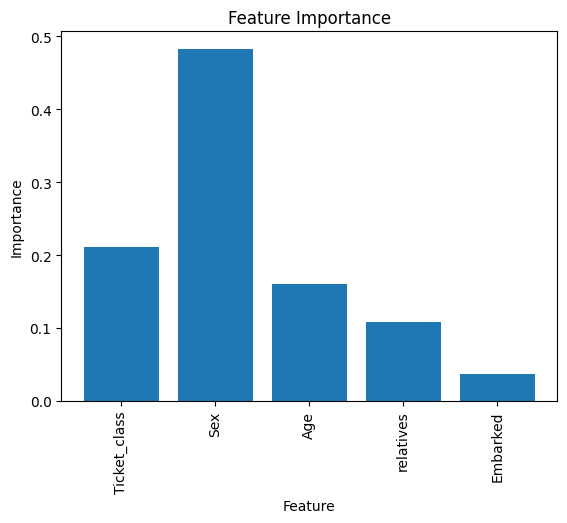

Random Forest Classification Accuracy: 78.21%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       106
           1       0.87      0.55      0.67        73

    accuracy                           0.78       179
   macro avg       0.81      0.75      0.75       179
weighted avg       0.80      0.78      0.77       179

Confusion Matrix:
[[100   6]
 [ 33  40]]


In [28]:
# Define the preprocess_data function
def preprocess_data(train_df, test_df):
    features = ["Ticket_class", "Sex", "Age", "relatives", "Embarked"]
    X = pd.get_dummies(train_df[features])
    X_test = pd.get_dummies(test_df[features])
    y = train_df["Survived"]
    return X, X_test, y

# Define the train_random_forest function
def train_random_forest(X, y):
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(X, y)
    return model

# Define the predict_survival function
def predict_survival(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Define the plot_predicted_class_distribution function
def plot_predicted_class_distribution(predictions):
    plt.bar(['Survived', 'Not Survived'], [sum(predictions), len(predictions) - sum(predictions)])
    plt.xlabel('Predicted Class')
    plt.ylabel('Count')
    plt.title('Predicted Class Distribution')
    plt.show()

# Define the plot_feature_importance function
def plot_feature_importance(X, importance):
    plt.bar(X.columns, importance)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.xticks(rotation='vertical')
    plt.show()

# Assuming you have already loaded the 'train_df' and 'test_df' DataFrames

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, train_df['Survived'], test_size=0.2, random_state=1)

# Preprocess the data
X, X_test, y = preprocess_data(X_train, X_test)

# Train the Random Forest model
model = train_random_forest(X, y)

# Make predictions on the test set
predictions = predict_survival(model, X_test)

# Plot predicted class distribution
plot_predicted_class_distribution(predictions)

# Plot feature importance
importance = model.feature_importances_
plot_feature_importance(X, importance)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Classification Accuracy:", f"{accuracy * 100:.2f}%")

# Additional metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Based on the results, we can evaluate the Random Forest classifier's performance as follows:

$Accuracy:$ The model achieved an accuracy of approximately 78.21%. This means that about 78.21% of the predictions were correct. It's a decent accuracy, but it's essential to consider other metrics as well, especially considering the class imbalance in the data.

<b>Classification Report:</b>

$Precision:$ Precision measures the proportion of true positive predictions out of all positive predictions (i.e., the model's ability to avoid false positives). For class 0, precision is 0.75, indicating that 75% of the predicted "Not Survived" cases were true negatives. For class 1, precision is 0.87, indicating that 87% of the predicted "Survived" cases were true positives.<br>
$Recall:$ Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances in the data. For class 0, recall is 0.94, meaning that 94% of the actual "Not Survived" cases were correctly identified. For class 1, recall is 0.55, indicating that 55% of the actual "Survived" cases were correctly identified.<br>
$F1-score:$ The F1-score is the harmonic mean of precision and recall and provides a balance between these two metrics. For class 0, the F1-score is 0.84, and for class 1, it is 0.67.

<b>Confusion Matrix:</b>

The confusion matrix shows the following results:

$True Positive (TP):$ 100 (correctly predicted "Not Survived")<br>
$True Negative (TN):$ 40 (correctly predicted "Survived")<br>
$False Positive (FP):$ 6 (incorrectly predicted "Not Survived" when it was "Survived")<br>
$False Negative (FN):$ 33 (incorrectly predicted "Survived" when it was "Not Survived")

Overall, the model's performance seems reasonable, with a higher accuracy, precision, recall, and F1-score for class 0 ("Not Survived"). However, the model's performance is weaker for class 1 ("Survived"), as indicated by a lower recall and F1-score. The class imbalance in the data (73 "Survived" instances and 106 "Not Survived" instances) may be affecting the model's ability to correctly predict the "Survived" class.

In [ ]:
# train_df drop columns
train_df = train_df.drop(['not_alone'], axis=1)

#test_df drop columns
test_df = test_df.drop(['not_alone'], axis=1)

In [ ]:
train_df.to_csv('clean_train.csv', index=False)
test_df.to_csv('clean_test.csv', index=False)